# Import relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.cm as cm
from pprint import pprint as pp
from networkx.algorithms import bipartite as bp
import matplotlib.pyplot as plt

# Load & Clean data

In [2]:
# get current working directory
wd = os.getcwd()
wd

'/Users/Isabella/Desktop/isa_NA_FTP'

In [3]:
# %% import and clean data
# import data
infile = os.path.join(wd, 'dataset', 'artist_search_update.csv')
col_lst = ['artists.items.0.name','artists.items.0.popularity',
           'artists.items.0.followers.total']
artistP_df = pd.read_csv(infile, usecols = col_lst)

artistP_df.rename(columns = {'artists.items.0.name': 'artist',
                         'artists.items.0.popularity': 'popularity',
                         'artists.items.0.followers.total':'followers'
                          }, inplace = True)
artistP_df = artistP_df[['artist', 'followers', 'popularity']]

In [4]:
artistP_df

,artist,followers,popularity
0,2 Chainz,5884856.0,85.0
1,21 Savage,8714721.0,91.0
2,24kGoldn,512014.0,91.0
3,42 Dugg,160672.0,76.0
4,50 Cent,6480492.0,86.0
...,...,...,...
348,Yugen Blakrok,10328.0,47.0
349,Yung Bleu,599603.0,70.0
350,Yung Pinch,415207.0,68.0
351,Zacari,61380.0,69.0


In [5]:
# load partition.csv
infile2 = os.path.join(wd, 'partition.csv')
partition = pd.read_csv(infile2)
partition

,artist,community
0,Chance the Rapper,0
1,Rick Ross,0
2,Gunna,0
3,Ambjaay,1
4,Young Nudy,0
...,...,...
310,SZA,2
311,Fivio Foreign,0
312,Saweetie,2
313,THE SCOTTS,0


In [6]:
# merge 'artistP_df' and 'partition' to make sure the 'artists' in partition are used only
artist_perf = pd.merge(artistP_df, partition, how = 'inner')
artist_perf.drop_duplicates(inplace = True)

In [7]:
# sort by community to make it cleaner
artist_perf.sort_values(by = 'community')

,artist,followers,popularity,community
0,2 Chainz,5884856.0,85.0,0
108,Huncho Jack,759256.0,66.0,0
236,REASON,99817.0,65.0,0
234,SOB X RBE,428343.0,63.0,0
111,Internet Money,162750.0,89.0,0
...,...,...,...,...
97,Gesaffelstein,355448.0,67.0,12
140,Kane Brown,2936832.0,83.0,13
158,Kris Wu,651520.0,57.0,14
45,Young T & Bugsey,220389.0,74.0,15


In [15]:
# load par_df.csv
infile2 = os.path.join(wd, 'par_df.csv')
par_df = pd.read_csv(infile2)

par_df1 = par_df[['artist', 'prob_similar']]
par_df1

,artist,prob_similar
0,Drake,0.366667
1,Dom Kennedy,0.538462
2,Pardison Fontaine,0.250000
3,9lokknine,1.000000
4,Childish Major,0.833333
...,...,...
290,Machine Gun Kelly,0.500000
291,Famous Dex,0.642857
292,Cardi B,0.230769
293,Lil Xan,0.500000


In [17]:
# merge artist_perf par_df1 by their common artists
merge = pd.merge(artist_perf, par_df1, how = 'inner')
merge

,artist,followers,popularity,community,prob_similar
0,2 Chainz,5884856.0,85.0,0,0.391304
1,21 Savage,8714721.0,91.0,0,0.540541
2,24kGoldn,512014.0,91.0,1,0.250000
3,42 Dugg,160672.0,76.0,0,0.750000
4,50 Cent,6480492.0,86.0,0,0.375000
...,...,...,...,...,...
290,Young Thug,5675094.0,93.0,0,0.474359
291,Yugen Blakrok,10328.0,47.0,6,1.000000
292,Yung Bleu,599603.0,70.0,0,0.500000
293,Yung Pinch,415207.0,68.0,1,0.428571


In [31]:
# %% create a dictionary, key is artist and value is community
temp = merge[['artist', 'community']]
temp.set_index('artist', inplace = True)

In [33]:
temp1 = temp.to_dict()
temp1 = temp1['community']
temp1

{'2 Chainz': 0,
 '21 Savage': 0,
 '24kGoldn': 1,
 '42 Dugg': 0,
 '50 Cent': 0,
 '6ix9ine': 1,
 '6LACK': 0,
 '9lokknine': 1,
 'A Boogie Wit da Hoodie': 0,
 'A$AP Ferg': 0,
 'A$AP Rocky': 0,
 'Alicia Keys': 2,
 'Ambjaay': 1,
 'Aminé': 0,
 'Anderson .Paak': 2,
 'Ant Clemons': 2,
 'Anuel AA': 3,
 'Aretha Franklin': 2,
 'Ariana Grande': 2,
 'Ashanti': 2,
 'Bad Bunny': 3,
 'Ball Greezy': 1,
 'Bastille': 2,
 'Bebe Rexha': 2,
 'Belly': 0,
 'Beyoncé': 2,
 'Bhad Bhabie': 2,
 'Big Sean': 0,
 'Billy Ray Cyrus': 11,
 'Blac Youngsta': 0,
 'blackbear': 2,
 'BlocBoy JB': 0,
 'Blueface': 0,
 'Bobby Shmurda': 0,
 'Brent Faiyaz': 0,
 'Bruno Mars': 2,
 'Bryson Tiller': 2,
 'Buddy': 0,
 'Young T & Bugsey': 15,
 'Busta Rhymes': 0,
 'Calboy': 0,
 'Calvin Harris': 2,
 'Cardi B': 2,
 'Carnage': 0,
 'Chance the Rapper': 0,
 'Chief Keef': 0,
 'Childish Gambino': 0,
 'Childish Major': 1,
 'Chloe x Halle': 2,
 'Chris Brown': 2,
 'Ciara': 2,
 'City Girls': 2,
 'Clever': 0,
 'Clipse': 0,
 'Cordae': 0,
 'Cozz': 1,
 '

# Plot popularity against homophily

In [52]:
merge0 = merge[merge['community'] == 0]
merge1 = merge[merge['community'] == 1]
merge01 = merge0.append(merge1)
merge01

,artist,followers,popularity,community,prob_similar
0,2 Chainz,5884856.0,85.0,0,0.391304
1,21 Savage,8714721.0,91.0,0,0.540541
3,42 Dugg,160672.0,76.0,0,0.750000
4,50 Cent,6480492.0,86.0,0,0.375000
6,6LACK,2596387.0,83.0,0,0.650000
...,...,...,...,...,...
246,StaySolidRocky,118243.0,76.0,1,1.000000
278,XXXTENTACION,23121091.0,93.0,1,0.230769
283,YK Osiris,962722.0,68.0,1,0.500000
284,YNW Melly,4959974.0,83.0,1,0.857143


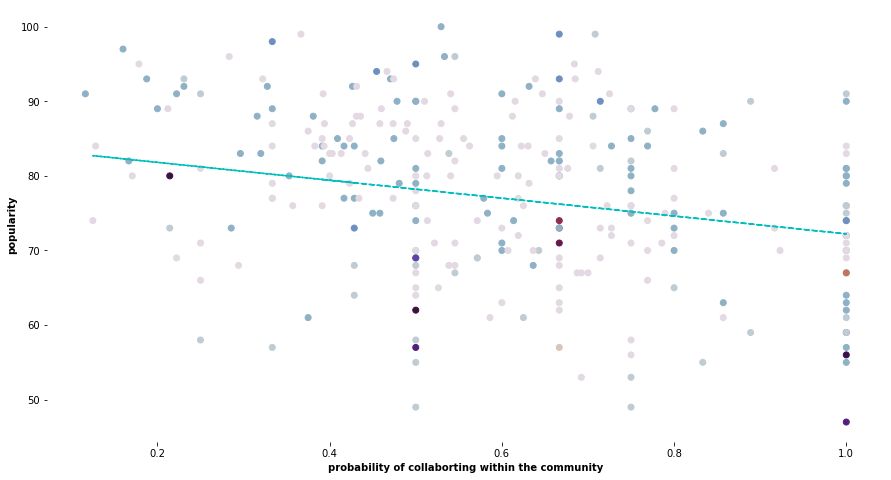

In [57]:
# %% plot the figure

# set the figure size and add plot
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)

# color the nodes according to their partition
cmap = cm.get_cmap('twilight', max(temp1.values()) + 1)

# decide x-axis & y-axis, color
ax.scatter(merge['prob_similar'], merge['popularity'],
           cmap = cmap, c = merge['community'],
           marker = 'o')

# add trendline of significant commuity
z = np.polyfit(merge01['prob_similar'], merge01['popularity'], 1)
p = np.poly1d(z)
plt.plot(merge01['prob_similar'],p(merge01['prob_similar']),'c--')

# remove all the spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# set the labels
ax.set_xlabel('probability of collaborting within the community', fontweight = 'bold')
ax.set_ylabel('popularity', 
               fontweight = 'bold')

# save the file
outfile = os.path.join(wd, 'popularity vs prob.png')
plt.savefig(outfile)

# Plot followers against probability of homophily collaboration

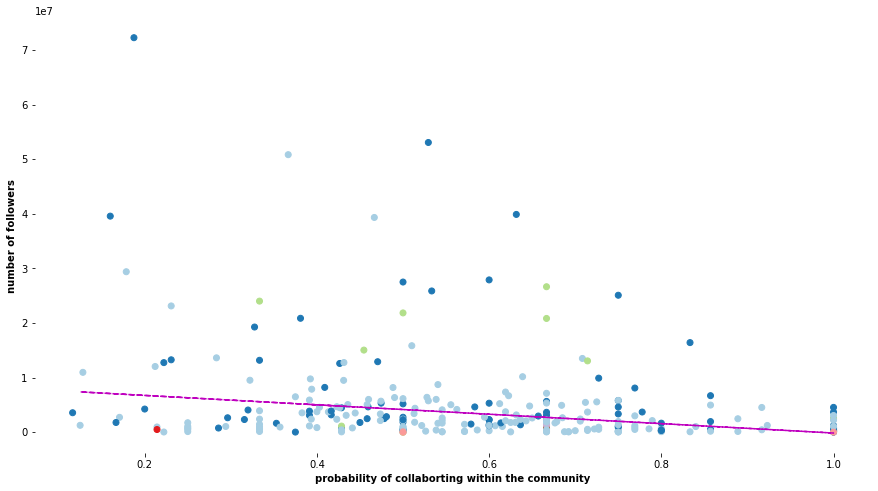

In [62]:
# %% plot the figure

# set the figure size and add plot
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)

# color the nodes according to their partition
cmap = cm.get_cmap('Paired', max(temp1.values()) + 1)

# decide x-axis & y-axis, color
ax.scatter(merge['prob_similar'], merge['followers'],
           cmap = cmap, c = merge['community'],
           marker = 'o')

# add trendline
z = np.polyfit(merge01['prob_similar'], merge01['followers'], 1)
p = np.poly1d(z)
plt.plot(merge01['prob_similar'],p(merge01['prob_similar']),'m--')

# remove all the spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# set the labels
ax.set_xlabel('probability of collaborting within the community', fontweight = 'bold')
ax.set_ylabel('number of followers', 
               fontweight = 'bold')

# save the file
outfile = os.path.join(wd, 'followers vs prob.png')
plt.savefig(outfile)